In [74]:
import pandas as pd
import numpy as np
import csv, json
import matplotlib.pyplot as plt
import re
from urllib.parse import urlparse
from pandas import Series

In [26]:
def getID(url):
    parsed_url = urlparse(url)
    path_segments = parsed_url.path.split('/')
    return int(path_segments[3])
getID("https://www.tiktokv.com/share/video/7315561816673750318/")

7315561816673750318

In [36]:
def processCsv(csvd):
    csvdf = csvd
    position = csvdf.columns.get_loc('video_timestamp') + 1
    csvdf.insert(position, 'video_time_watched', np.nan)
    return csvdf

In [58]:
def processJson(jsond): #for Sec2Gr2 files
    jsondf = jsond
    jsondf['video_id'] = jsondf['Link'].apply(getID)
    return jsondf

def processJson2(jsonfilename): #for Sec1Gr1 files
    filename = f'{jsonfilename}'
    with open(filename, 'r') as file:
        jsondata = json.load(file)

    jsondict = {'Date':[],'Link':[],'video_id':[]}
    for video in jsondata['data']:
        jsondict['Link'].append(video[1])
        jsondict['video_id'].append(getID(video[1])) 
        jsondict['Date'].append(video[0])

    jsondf = pd.DataFrame(jsondict)
    return jsondf
    

In [7]:
#for ech pair create new df with date
def merged_date(csvd, jsond):
    csvdf = csvd
    jsondf = jsond
    csvrow = 0
    jsonrow = 0
    for id in jsondf['video_id']: #for each video watched in json
        if id == csvdf['video_id'][csvrow]: #if the id for the json equals the next csv row
            csvdf.loc[csvrow, 'video_time_watched'] = jsondf.loc[jsonrow, 'Date']
            if csvrow < len(csvdf)-1:
                csvrow = csvrow+1   #go on to the next csv row
        jsonrow = jsonrow + 1  #go to the next json no matter if match or not
    return csvdf



In [64]:
#processjson and csv and insert
def mergefile(csv,json): #for Sec2gr2 files
    csvfile = pd.read_csv(f'{csv}')
    jsonfile = pd.read_json(f'{json}')
    return merged_date(processCsv(csvfile), processJson(jsonfile))

def mergefile2(csv,json): #for Sec1Gr1 files
    csvfile = pd.read_csv(f'{csv}')
    jsonfile = processJson2(f'{json}')
    return merged_date(processCsv(csvfile),jsonfile)
    
#sec1gr2_csv = pd.read_csv('pyktok_data/Sec1Gr2_26301.csv') #come back label wrong
#sec1gr2_json = pd.read_json('user_jsons/Sec2Gr2_26301.json')

In [122]:
size1 = len(pd.read_csv('pyktok_data/Sec1Gr1_12345.csv'))
with open('user_jsons/Sec1Gr1_12345.json', 'r') as file:
    jsondata = json.load(file)
size2 = len(jsondata['data'])
print(size1, size2)

19102 20621


In [116]:
df26301 = mergefile('pyktok_data/Sec1Gr2_26301.csv','user_jsons/Sec2Gr2_26301.json')
df33534 = mergefile('pyktok_data/Sec1Gr2_33534.csv','user_jsons/Sec2Gr2_33534.json')
df38129 = mergefile('pyktok_data/Sec1Gr2_38129.csv', 'user_jsons/Sec2Gr2_38129.json')
df11111 = mergefile('pyktok_data/Sec1Gr3_11111.csv','user_jsons/Sec1Gr3_11111.json')
df10824 = mergefile2('pyktok_data/Sec1Gr1_10824.csv','user_jsons/Sec1Gr1_10824.json')
df12345 = mergefile2('pyktok_data/Sec1Gr1_12345.csv','user_jsons/Sec1Gr1_12345.json')
df50405 = mergefile2('pyktok_data/Sec1Gr1_50405.csv','user_jsons/Sec1Gr1_50405.json')

dfs = [df26301,df33534,df38129,df10824,df12345,df50405,df11111]

all_dfs = pd.concat(dfs)
df10824


/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/966991795.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-03-06 19:44:41' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  csvdf.loc[csvrow, 'video_time_watched'] = jsondf.loc[jsonrow, 'Date']
/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/966991795.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-03-08 03:42:17' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  csvdf.loc[csvrow, 'video_time_watched'] = jsondf.loc[jsonrow, 'Date']
/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/2354271149.py:3: DtypeWarning: Columns (8,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  csvfile = pd.read_csv(f

,Unnamed: 0,video_id,video_timestamp,video_time_watched,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,...,video_is_ad,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified
0,0,7328672125441658117,2024-01-27T02:10:53,2024-02-09 23:35:22,6.0,US,"when you see cute guy in public, when u see gu...",479600.0,7373.0,6081.0,...,False,NaN,elsarca,Elsarca,NaN,NaN,NaN,NaN,NaN,False
1,1,7326611895509585185,2024-01-21T12:56:09,2024-02-26 23:29:56,18.0,GB,"Eggs, Ghanaian Food, Cracking Egg, Egg Breakfa...",36700.0,722.0,797.0,...,False,NaN,e.michael_,Michael,NaN,NaN,NaN,NaN,NaN,False
2,2,7324765984139644192,2024-01-16T13:33:06,2024-02-26 23:28:15,178.0,IT,"ateez mama 2023, Ateez, treasure, idols reacti...",449200.0,886.0,1230.0,...,False,NaN,jaehyunsocks_2,:),NaN,NaN,NaN,NaN,NaN,False
3,3,7329768535524429102,2024-01-30T01:05:45,2024-02-26 23:27:53,28.0,US,NaN,33800.0,339.0,103.0,...,False,NaN,kylaa134,kyla robinson,NaN,NaN,NaN,NaN,NaN,False
4,4,7338541911629745414,2024-02-22T16:30:41,2024-02-26 23:27:42,11.0,NG,NaN,920.0,8.0,12.0,...,False,NaN,itz_queenbel,Queenbel🤧,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10534,7311407391344577834,2023-12-11T13:35:13,NaN,15.0,US,NaN,19.0,0.0,2.0,...,False,NaN,isha.conteh186,Isha Conteh,NaN,NaN,NaN,NaN,NaN,False
10995,10535,7302715892591316229,2023-11-18T03:27:26,NaN,61.0,GH,NaN,48900.0,233.0,696.0,...,False,NaN,asafopowers51,Asafopowers🇳🇬🇳🇬🇬🇭🇬🇭,NaN,NaN,NaN,NaN,NaN,False
10996,10536,7309494178323680517,2023-12-06T09:50:37,NaN,43.0,NG,NaN,471.0,16.0,15.0,...,False,NaN,judith__jeremy,Judith❤️,NaN,NaN,NaN,NaN,NaN,False
10997,10537,7311401109233487147,2023-12-11T13:10:49,NaN,105.0,US,NaN,2.0,0.0,0.0,...,False,NaN,insightfuloptions,insightfuloptions,NaN,NaN,NaN,NaN,NaN,False


In [130]:
ads10824 = df10824[df10824['video_is_ad']==True]
ads11111 = df11111[df11111['video_is_ad']==True]
ads50405 = df50405[df50405['video_is_ad']==True]
ads12345 = df12345[df12345['video_is_ad']==True]
ads26301 = df26301[df26301['video_is_ad']==True]
ads38129 = df38129[df38129['video_is_ad']==True]
ads33534 = df33534[df33534['video_is_ad']==True]

allads = [ads10824,ads11111,ads50405,ads12345,ads26301,ads38129,ads33534]

for df in allads:
    print(df.size)

allads = [ads10824,ads50405,ads12345,ads26301,ads38129,ads33534]

ads33534

5984
0
74466
37296
22659
42
26355


,video_id,video_timestamp,video_time_watched,video_duration,video_locationcreated,suggested_words,video_diggcount,video_sharecount,video_commentcount,video_playcount,...,video_is_ad,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified
24,7327757398427438378,2024-01-24T15:02:00,NaN,6.0,US,"skittles littles, skittles, Skittles Candy, mi...",7385.0,131.0,257.0,21800000.0,...,True,NaN,skittles,skittles,NaN,NaN,NaN,NaN,NaN,True
30,7314122026002795777,2023-12-18T21:09:04,NaN,17.0,FAKE-AD,"savings, Saving Money Envelopes, saving money ...",2595.0,5.0,1.0,19200000.0,...,True,NaN,Fidelity Smart Money℠,Fidelity Smart Money℠,NaN,NaN,NaN,NaN,NaN,False
36,7273551672897457451,2023-08-31T14:15:27,NaN,13.0,US,"pizza rice, pizza rice recipe, seeds of change...",96600.0,2218.0,1154.0,43300000.0,...,True,NaN,seedsofchangeofficial,Seeds Of Change,NaN,NaN,NaN,NaN,NaN,True
42,7337826415993163009,2024-02-20T18:14:11,NaN,14.0,FAKE-AD,"Opi Nail Polish, Painting My Nails, Makeup Pal...",57800.0,4.0,204.0,13900000.0,...,True,NaN,OPI,OPI,NaN,NaN,NaN,NaN,NaN,False
47,7335575308197760257,2024-02-14T16:38:43,NaN,12.0,FAKE-AD,"knorr, Good Food, Food To Eat, food ideas, foo...",1715.0,30.0,17.0,15200000.0,...,True,NaN,Knorr,Knorr,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7633,7319577304152296750,2024-01-02T13:58:42,NaN,27.0,US,NaN,16900.0,143.0,305.0,49800000.0,...,True,NaN,teatinz,Tivona,NaN,NaN,NaN,NaN,NaN,False
7640,7314770555217906946,2023-12-20T15:05:40,NaN,6.0,FAKE-AD,NaN,6282.0,43.0,0.0,17500000.0,...,True,NaN,Keurig,Keurig,NaN,NaN,NaN,NaN,NaN,False
7646,7318767572969590058,2023-12-31T09:36:36,NaN,26.0,US,NaN,79400.0,445.0,584.0,18300000.0,...,True,NaN,espn,ESPN,NaN,NaN,NaN,NaN,NaN,True
7652,7262027736665836846,2023-07-31T12:56:44,NaN,38.0,US,"jon seaton highlights, jon seaton, Day In Life...",710700.0,2654.0,2120.0,136400000.0,...,True,NaN,jonseaton,Jon Seaton,NaN,NaN,NaN,NaN,NaN,False


In [129]:
ads26301['video_time_watched'] = pd.to_datetime(ads26301['video_time_watched'])
print(ads26301.groupby(ads26301['video_time_watched'].dt.to_period('M')).size())

video_time_watched
2024-02    445
2024-03    634
Freq: M, dtype: int64


/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/3362549931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adsdf['video_time_watched'] = pd.to_datetime(adsdf['video_time_watched'])
/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/3362549931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adsdf['video_time_watched'] = pd.to_datetime(adsdf['video_time_watched'])
/var/folders/ls/b1_wv00s5r5fjstz103_p3rh0000gn/T/ipykernel_31834/3362549931.py:8: SettingWithCopyWarning: 
A

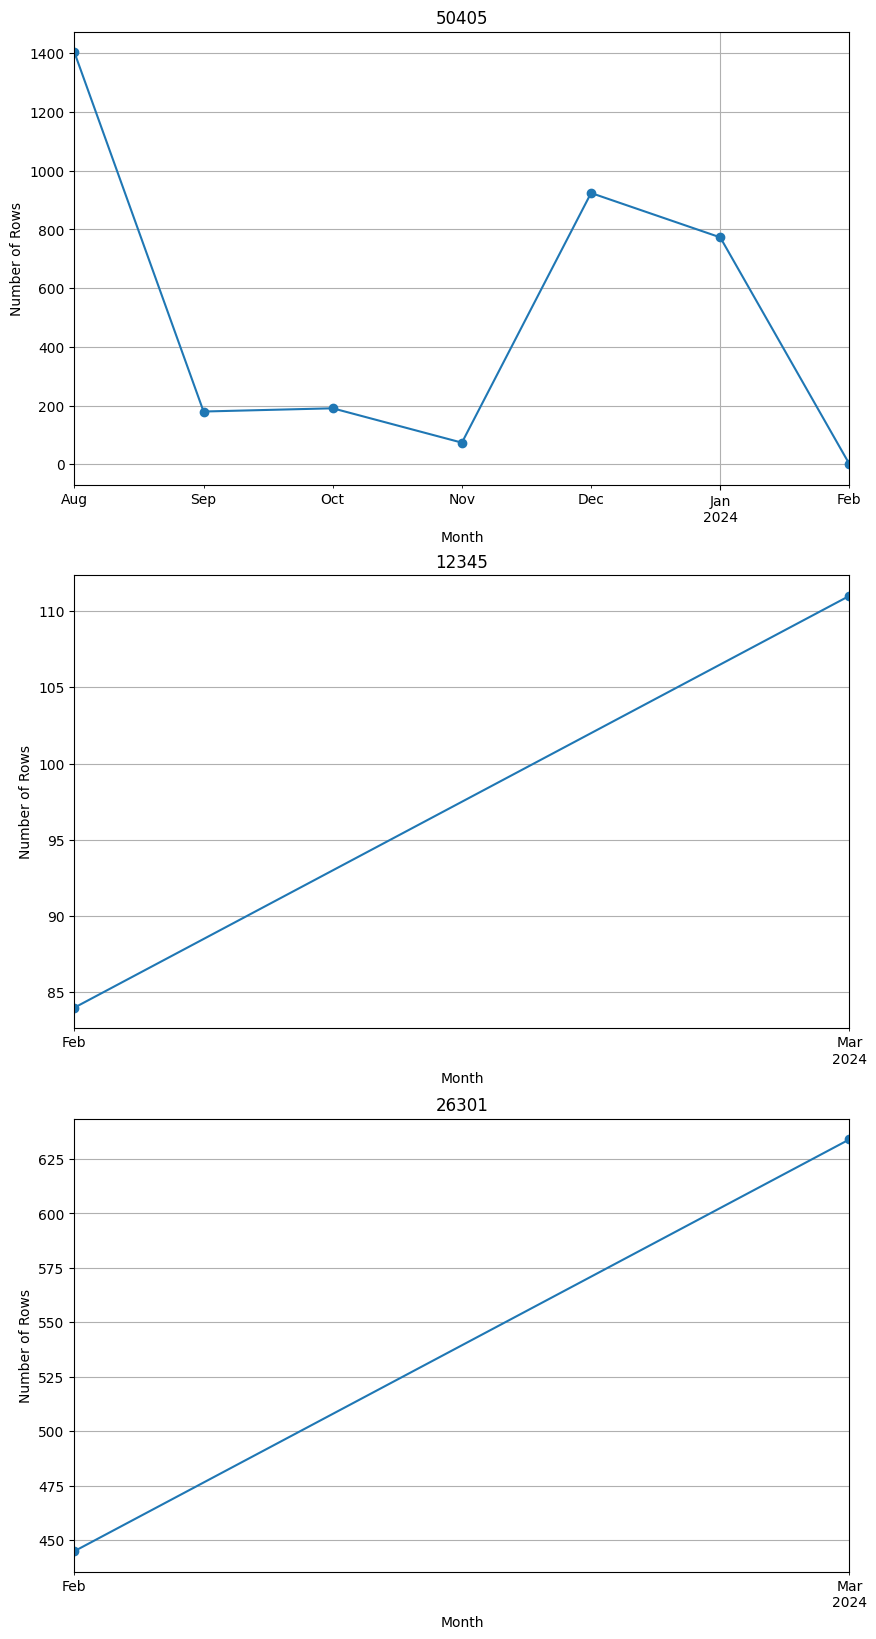

In [131]:
someads = [ads50405,ads12345,ads26301]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

adsIDs = ['50405','12345','26301']

for i, adsdf in enumerate(someads):
    adsdf['video_time_watched'] = pd.to_datetime(adsdf['video_time_watched'])
    monthlycounts = adsdf.groupby(adsdf['video_time_watched'].dt.to_period('M')).size()
    
    # Plot the time series on the corresponding subplot
    ax = axes[i]
    monthlycounts.plot(kind='line', marker='o', linestyle='-',ax=ax)
    
    # Customize the subplot
    ax.set_title(adsIDs[i])
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Rows')
    ax.grid(True)

In [174]:
new = processJson(sec1gr2_json)
id = 7328816594363338030
indices = new.query('video_id == 7328816594363338030').index.tolist()
print(indices)
#print(csv.duplicated(subset='video_id').sum())

[13855]
